<a href="https://colab.research.google.com/github/zhulkhoirrifat/Air-Quality-Analysis/blob/main/forecasting_fnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Library

Langkah pertama adalah mengimpor library yang dibutuhkan untuk proses data dan machine learning.

- `pandas` dan `numpy` untuk manipulasi data
- `matplotlib` dan `seaborn` untuk visualisasi
- `sklearn` untuk preprocessing dan model ML


In [105]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load dan Persiapan Data

Dataset diambil dari file CSV. Setelah itu, dilakukan pengecekan awal seperti:
- Menampilkan 5 data teratas
- Melihat tipe data dan jumlah missing values
- Menampilkan statistik deskriptif
- Menghapus kolom yang tidak relevan
- Mengubah tipe data jika diperlukan

In [106]:
products_df = pd.read_csv('products.csv')
transactions_df = pd.read_csv('transactions.csv')
transaction_details_df = pd.read_csv('transaction_details.csv')
stores_df = pd.read_csv('stores.csv')

In [107]:
transactions_df.columns

Index(['transactionId', 'invoiceId', 'customerId', 'userId', 'storeId',
       'paymentMethodId', 'totalAmount', 'cash', 'change', 'discount',
       'transactionDate', 'status'],
      dtype='object')

In [108]:
transactions_df = transactions_df.rename(columns={'discount': 'discountPerson', 'status': 'statusTransaction' })

In [109]:
transactions_df

,transactionId,invoiceId,customerId,userId,storeId,paymentMethodId,totalAmount,cash,change,discountPerson,transactionDate,statusTransaction
0,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,2024-01-05 16:32:15,COMPLETED
1,2,INV-365305136653,4473.0,87,1,4,6462102.675,6465590.675,3488.0,40255,2024-01-07 17:00:25,COMPLETED
2,3,INV-565898748505,4266.0,104,1,6,1574522.555,1575216.555,694.0,14347,2024-01-07 09:13:01,COMPLETED
3,4,INV-352581681149,NaN,87,1,6,2272749.410,2274590.410,1841.0,241966,2024-01-06 17:45:03,COMPLETED
4,5,INV-841807629694,NaN,104,1,5,1854214.970,1857017.970,2803.0,15325,2024-01-10 09:39:42,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
74460,74461,INV-859245276810,1480.0,69,30,5,2046689.110,2046970.110,281.0,120015,2025-03-03 16:26:09,COMPLETED
74461,74462,INV-889965994024,2143.0,63,30,4,1619452.950,1622138.950,2686.0,169850,2025-03-02 10:42:57,COMPLETED
74462,74463,INV-434247205794,NaN,63,30,3,8083984.930,8084102.930,118.0,510195,2025-03-09 15:42:52,COMPLETED
74463,74464,INV-789766494301,2211.0,126,30,3,512262.800,514349.800,2087.0,6468,2025-03-08 10:06:22,COMPLETED


In [110]:
transaction_details_df.columns

Index(['transactionDetailId', 'transactionId', 'productId', 'variantId',
       'quantity', 'subtotal'],
      dtype='object')

In [111]:
transaction_details_df

,transactionDetailId,transactionId,productId,variantId,quantity,subtotal
0,1,1,1,1,1,117205
1,2,1,10,10,3,170145
2,3,1,7,7,5,1911025
3,4,1,3,3,2,203252
4,5,1,8,8,4,4098504
...,...,...,...,...,...,...
223031,223032,74463,319,319,4,295404
223032,223033,74463,311,311,1,234123
223033,223034,74463,314,314,5,2413225
223034,223035,74464,319,319,5,453040


In [112]:
products_df.columns

Index(['productId', 'productCode', 'serialNumber', 'categoryId', 'name',
       'description', 'discount', 'basePrice', 'imageUrl', 'isActive',
       'storeId', 'createdAt', 'updatedAt'],
      dtype='object')

In [113]:
products_df = products_df.rename(columns={
    'name': 'productName',
    'description': 'descriptionProduct',
    'discount': 'productDiscount'
})

In [114]:
products_df

,productId,productCode,serialNumber,categoryId,productName,descriptionProduct,productDiscount,basePrice,imageUrl,isActive,storeId,createdAt,updatedAt
0,1,PRD-695928,963923.0,39,Hairdreyer Perferendis,Quo inventore tempora optio eveniet ipsam labo...,12,69000,https://picsum.photos/22/43,True,1,2025-02-04T14:40:48.928153,2025-03-12T21:23:22.610154
1,2,PRD-862388,NaN,32,Maskara Placeat,Iusto cumque atque veritatis sit perferendis d...,0,198000,https://dummyimage.com/874x892,True,1,2025-02-18T16:26:56.533520,2025-01-23T13:32:51.521248
2,3,PRD-329650,NaN,29,Foundation Eligendi,Eligendi commodi non cumque non corporis.,0,67000,https://picsum.photos/25/633,True,1,2025-03-20T14:22:49.629659,2025-04-04T05:06:01.999202
3,4,PRD-102631,587021.0,39,Hairdreyer Necessitatibus,Quas ullam voluptates saepe molestias neque as...,0,305000,https://dummyimage.com/1001x526,True,1,2025-03-26T08:22:42.598583,2025-01-05T17:05:29.461228
4,5,PRD-615295,510829.0,26,Serum Fugit,Ea quibusdam nisi magni aspernatur deleniti do...,0,75000,https://picsum.photos/229/252,True,1,2025-03-28T06:28:28.525055,2025-03-02T18:36:31.684907
...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,315,PRD-787793,179754.0,83,Voucher Game Perferendis,Veniam soluta aliquid iste fugiat molestias si...,0,95000,https://placekitten.com/100/771,True,30,2025-02-03T17:19:38.197010,2025-01-27T16:06:36.011353
315,316,PRD-456989,NaN,84,Pembayaran Tagihan Id,Corporis voluptas similique id ipsam animi a e...,0,46000,https://placekitten.com/266/840,True,30,2025-03-25T14:26:02.091460,2025-02-19T09:55:33.641396
316,317,PRD-966859,NaN,82,Token Listrik PLN Ducimus,Tenetur sequi dolorem tenetur aut odio sit num...,0,96000,https://dummyimage.com/443x806,True,30,2025-03-05T20:44:55.353898,2025-02-20T07:40:13.293332
317,318,PRD-818093,NaN,84,Pembayaran Tagihan Repellat,Possimus modi nesciunt soluta alias commodi pr...,0,265000,https://dummyimage.com/879x1009,True,30,2025-03-23T05:52:51.158741,2025-03-20T16:26:18.621533


In [115]:
stores_df.columns

Index(['storeId', 'StoreCode', 'tenantId', 'name', 'image', 'address',
       'provinceId', 'cityId', 'districtId', 'villageId', 'storeTypeId',
       'postalCode', 'description', 'phoneNumber', 'logo', 'npwpCompany',
       'permitCertificate', 'status'],
      dtype='object')

In [116]:
stores_df = stores_df.rename(columns={
    'name': 'storeName',
    'description': 'storeDescription',
    'status': 'storeStatus'
})

In [117]:
stores_df

,storeId,StoreCode,tenantId,storeName,image,address,provinceId,cityId,districtId,villageId,storeTypeId,postalCode,storeDescription,phoneNumber,logo,npwpCompany,permitCertificate,storeStatus
0,1,STR-925013527419,1,Perawatan Diri & Kecantikan Haryanti,https://dummyimage.com/178x0,"Gg. H.J Maemunah No. 35\nGorontalo, Sulawesi U...",32,71,5783,61365,3,30367,Asperiores placeat unde ipsam consequatur qui ...,+62-057-854-8567,https://placekitten.com/853/886,https://picsum.photos/693/10,https://placekitten.com/167/986,ACTIVE
1,2,STR-839179142747,1,Makanan & Minuman Haryanti,https://picsum.photos/410/452,"Jalan Erlangga No. 83\nSungai Penuh, Sumatera ...",32,71,5783,61019,1,68754,Eveniet architecto culpa sequi quam adipisci v...,+62 (0822) 653 3014,https://picsum.photos/848/460,https://dummyimage.com/246x886,https://placekitten.com/13/814,ACTIVE
2,3,STR-334650501089,1,"Elektronik, Gadget & Alat Musik Haryanti",https://placekitten.com/978/313,"Jl. Indragiri No. 10\nBima, SR 43661",32,71,5753,60899,4,86048,Ea aliquam expedita soluta debitis provident a...,+62-0179-772-6979,https://dummyimage.com/711x985,https://placekitten.com/126/552,https://dummyimage.com/986x483,ACTIVE
3,4,STR-515842642935,1,"Mainan, Hobi & Peralatan Outdoor Haryanti",https://dummyimage.com/948x492,"Gg. Gegerkalong Hilir No. 43\nSolok, Jawa Bara...",32,71,5753,62384,8,96165,Voluptate voluptates molestiae natus. Occaecat...,+62 (573) 417-7191,https://placekitten.com/423/870,https://placekitten.com/728/46,https://placekitten.com/900/389,ACTIVE
4,5,STR-410066469690,2,Makanan & Minuman Hastuti,https://placekitten.com/616/406,"Gang Cikutra Timur No. 608\nPasuruan, NT 01112",32,71,5507,60714,1,7681,Aspernatur ratione eveniet in provident optio....,+62-885-851-8517,https://dummyimage.com/519x150,https://dummyimage.com/117x906,https://dummyimage.com/175x912,ACTIVE
5,6,STR-322065532906,3,Peralatan Bayi & Anak Hutasoit,https://picsum.photos/66/258,"Gang PHH. Mustofa No. 46\nBanjarbaru, Jawa Bar...",32,71,5693,60710,9,56024,Explicabo provident quis iure similique nulla....,+62 (028) 686 2723,https://dummyimage.com/426x607,https://picsum.photos/298/898,https://placekitten.com/595/305,ACTIVE
6,7,STR-358421775327,3,Peralatan Bayi & Anak Hutasoit Cabang 2,https://dummyimage.com/947x312,"Jl. Ciwastra No. 8\nCilegon, KB 29275",32,71,5753,62384,9,71707,Alias qui corporis. Non in dignissimos facere....,+62-904-901-6453,https://placekitten.com/103/999,https://dummyimage.com/885x781,https://placekitten.com/689/636,ACTIVE
7,8,STR-181457001717,3,"Elektronik, Gadget & Alat Musik Hutasoit",https://picsum.photos/679/989,"Jalan KH Amin Jasuta No. 508\nCimahi, DI Yogya...",32,71,5579,60197,4,64913,Ab excepturi consequuntur voluptate. Sapiente ...,+62 (571) 352-6781,https://picsum.photos/286/759,https://dummyimage.com/546x600,https://placekitten.com/225/168,ACTIVE
8,9,STR-169510383824,3,Makanan & Minuman Hutasoit,https://picsum.photos/996/377,"Jl. Rumah Sakit No. 113\nSurabaya, Gorontalo 9...",32,71,5507,58912,1,73256,Assumenda quo sit vero delectus. Enim ex esse....,+62 (015) 819-9069,https://picsum.photos/334/657,https://placekitten.com/806/381,https://picsum.photos/748/511,ACTIVE
9,10,STR-469784193411,4,Perawatan Diri & Kecantikan Purwanti,https://picsum.photos/647/403,"Gang Sadang Serang No. 77\nTangerang, Jawa Bar...",32,71,5783,63284,3,77821,Sint magnam enim nobis recusandae. Odit eius n...,+62 (21) 042 2602,https://picsum.photos/649/948,https://dummyimage.com/976x880,https://placekitten.com/358/16,ACTIVE


In [118]:
# menggabungkan dataframe product dan store_fnb
merge_step1 = pd.merge(transactions_df, transaction_details_df, on='transactionId', how='left')
merge_step1

,transactionId,invoiceId,customerId,userId,storeId,paymentMethodId,totalAmount,cash,change,discountPerson,transactionDate,statusTransaction,transactionDetailId,productId,variantId,quantity,subtotal
0,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,2024-01-05 16:32:15,COMPLETED,1,1,1,1,117205
1,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,2024-01-05 16:32:15,COMPLETED,2,10,10,3,170145
2,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,2024-01-05 16:32:15,COMPLETED,3,7,7,5,1911025
3,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,2024-01-05 16:32:15,COMPLETED,4,3,3,2,203252
4,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,2024-01-05 16:32:15,COMPLETED,5,8,8,4,4098504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223031,74463,INV-434247205794,NaN,63,30,3,8083984.930,8084102.930,118.0,510195,2025-03-09 15:42:52,COMPLETED,223032,319,319,4,295404
223032,74463,INV-434247205794,NaN,63,30,3,8083984.930,8084102.930,118.0,510195,2025-03-09 15:42:52,COMPLETED,223033,311,311,1,234123
223033,74463,INV-434247205794,NaN,63,30,3,8083984.930,8084102.930,118.0,510195,2025-03-09 15:42:52,COMPLETED,223034,314,314,5,2413225
223034,74464,INV-789766494301,2211.0,126,30,3,512262.800,514349.800,2087.0,6468,2025-03-08 10:06:22,COMPLETED,223035,319,319,5,453040


In [119]:
# mengeluarkan kolom storeId dari dataframe products_df
products_df.pop('storeId')

,storeId
0,1
1,1
2,1
3,1
4,1
...,...
314,30
315,30
316,30
317,30


In [120]:
# menggabungkan dataframe transaction dan products_stores_fnb
merge_step2 = pd.merge(merge_step1, products_df, on='productId', how='left')
merge_step2

,transactionId,invoiceId,customerId,userId,storeId,paymentMethodId,totalAmount,cash,change,discountPerson,...,serialNumber,categoryId,productName,descriptionProduct,productDiscount,basePrice,imageUrl,isActive,createdAt,updatedAt
0,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,...,963923.0,39,Hairdreyer Perferendis,Quo inventore tempora optio eveniet ipsam labo...,12,69000,https://picsum.photos/22/43,True,2025-02-04T14:40:48.928153,2025-03-12T21:23:22.610154
1,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,...,559709.0,33,Shampoo Dolores,Commodi magni maiores facere excepturi fuga vo...,15,35000,https://placekitten.com/1015/681,True,2025-03-31T20:56:51.742660,2025-03-23T04:45:07.611501
2,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,...,NaN,31,Lipstik Incidunt,Delectus eius sunt voluptates commodi repudian...,0,334000,https://placekitten.com/268/351,True,2025-01-31T07:35:48.403250,2025-01-29T08:54:00.588472
3,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,...,NaN,29,Foundation Eligendi,Eligendi commodi non cumque non corporis.,0,67000,https://picsum.photos/25/633,True,2025-03-20T14:22:49.629659,2025-04-04T05:06:01.999202
4,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,...,NaN,40,Catokan Saepe,Sint sit natus saepe voluptate veritatis velit...,0,990000,https://dummyimage.com/465x367,True,2025-01-03T01:46:59.323907,2025-03-22T02:30:45.629478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223031,74463,INV-434247205794,NaN,63,30,3,8083984.930,8084102.930,118.0,510195,...,NaN,84,Pembayaran Tagihan Inventore,Necessitatibus incidunt unde exercitationem la...,0,68000,https://dummyimage.com/669x819,True,2025-01-29T03:18:27.756428,2025-03-30T17:12:28.337072
223032,74463,INV-434247205794,NaN,63,30,3,8083984.930,8084102.930,118.0,510195,...,NaN,81,Pulsa & Paket Data Nesciunt,Ipsum libero est deleniti tempora ullam autem.,0,224000,https://placekitten.com/466/218,True,2025-01-27T10:25:17.114496,2025-01-10T03:12:36.484288
223033,74463,INV-434247205794,NaN,63,30,3,8083984.930,8084102.930,118.0,510195,...,NaN,82,Token Listrik PLN Assumenda,Unde earum velit id nulla eaque illum nobis re...,0,473000,https://dummyimage.com/807x454,True,2025-01-21T23:43:40.238393,2025-02-04T13:16:48.375766
223034,74464,INV-789766494301,2211.0,126,30,3,512262.800,514349.800,2087.0,6468,...,NaN,84,Pembayaran Tagihan Inventore,Necessitatibus incidunt unde exercitationem la...,0,68000,https://dummyimage.com/669x819,True,2025-01-29T03:18:27.756428,2025-03-30T17:12:28.337072


In [121]:
final_df = pd.merge(merge_step2, stores_df, on='storeId', how='left')
final_df

,transactionId,invoiceId,customerId,userId,storeId,paymentMethodId,totalAmount,cash,change,discountPerson,...,districtId,villageId,storeTypeId,postalCode,storeDescription,phoneNumber,logo,npwpCompany,permitCertificate,storeStatus
0,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,...,5783,61365,3,30367,Asperiores placeat unde ipsam consequatur qui ...,+62-057-854-8567,https://placekitten.com/853/886,https://picsum.photos/693/10,https://placekitten.com/167/986,ACTIVE
1,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,...,5783,61365,3,30367,Asperiores placeat unde ipsam consequatur qui ...,+62-057-854-8567,https://placekitten.com/853/886,https://picsum.photos/693/10,https://placekitten.com/167/986,ACTIVE
2,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,...,5783,61365,3,30367,Asperiores placeat unde ipsam consequatur qui ...,+62-057-854-8567,https://placekitten.com/853/886,https://picsum.photos/693/10,https://placekitten.com/167/986,ACTIVE
3,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,...,5783,61365,3,30367,Asperiores placeat unde ipsam consequatur qui ...,+62-057-854-8567,https://placekitten.com/853/886,https://picsum.photos/693/10,https://placekitten.com/167/986,ACTIVE
4,1,INV-580186248279,2.0,87,1,6,6930349.995,6931890.995,1541.0,512300,...,5783,61365,3,30367,Asperiores placeat unde ipsam consequatur qui ...,+62-057-854-8567,https://placekitten.com/853/886,https://picsum.photos/693/10,https://placekitten.com/167/986,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223031,74463,INV-434247205794,NaN,63,30,3,8083984.930,8084102.930,118.0,510195,...,5753,62384,12,73124,Eaque magni tempore. Suscipit illo distinctio ...,+62 (59) 124 9865,https://picsum.photos/317/397,https://placekitten.com/726/237,https://dummyimage.com/356x296,ACTIVE
223032,74463,INV-434247205794,NaN,63,30,3,8083984.930,8084102.930,118.0,510195,...,5753,62384,12,73124,Eaque magni tempore. Suscipit illo distinctio ...,+62 (59) 124 9865,https://picsum.photos/317/397,https://placekitten.com/726/237,https://dummyimage.com/356x296,ACTIVE
223033,74463,INV-434247205794,NaN,63,30,3,8083984.930,8084102.930,118.0,510195,...,5753,62384,12,73124,Eaque magni tempore. Suscipit illo distinctio ...,+62 (59) 124 9865,https://picsum.photos/317/397,https://placekitten.com/726/237,https://dummyimage.com/356x296,ACTIVE
223034,74464,INV-789766494301,2211.0,126,30,3,512262.800,514349.800,2087.0,6468,...,5753,62384,12,73124,Eaque magni tempore. Suscipit illo distinctio ...,+62 (59) 124 9865,https://picsum.photos/317/397,https://placekitten.com/726/237,https://dummyimage.com/356x296,ACTIVE


In [122]:
final_df.columns

Index(['transactionId', 'invoiceId', 'customerId', 'userId', 'storeId',
       'paymentMethodId', 'totalAmount', 'cash', 'change', 'discountPerson',
       'transactionDate', 'statusTransaction', 'transactionDetailId',
       'productId', 'variantId', 'quantity', 'subtotal', 'productCode',
       'serialNumber', 'categoryId', 'productName', 'descriptionProduct',
       'productDiscount', 'basePrice', 'imageUrl', 'isActive', 'createdAt',
       'updatedAt', 'StoreCode', 'tenantId', 'storeName', 'image', 'address',
       'provinceId', 'cityId', 'districtId', 'villageId', 'storeTypeId',
       'postalCode', 'storeDescription', 'phoneNumber', 'logo', 'npwpCompany',
       'permitCertificate', 'storeStatus'],
      dtype='object')

In [123]:
#mengambil data toko dengan tipe toko id 1 yaitu fnb
final_df = final_df[final_df['storeTypeId'] == 1]
final_df

,transactionId,invoiceId,customerId,userId,storeId,paymentMethodId,totalAmount,cash,change,discountPerson,...,districtId,villageId,storeTypeId,postalCode,storeDescription,phoneNumber,logo,npwpCompany,permitCertificate,storeStatus
5657,1861,INV-110194253548,NaN,88,2,2,1212558.240,1212558.240,0.0,126075,...,5783,61019,1,68754,Eveniet architecto culpa sequi quam adipisci v...,+62 (0822) 653 3014,https://picsum.photos/848/460,https://dummyimage.com/246x886,https://placekitten.com/13/814,ACTIVE
5658,1861,INV-110194253548,NaN,88,2,2,1212558.240,1212558.240,0.0,126075,...,5783,61019,1,68754,Eveniet architecto culpa sequi quam adipisci v...,+62 (0822) 653 3014,https://picsum.photos/848/460,https://dummyimage.com/246x886,https://placekitten.com/13/814,ACTIVE
5659,1861,INV-110194253548,NaN,88,2,2,1212558.240,1212558.240,0.0,126075,...,5783,61019,1,68754,Eveniet architecto culpa sequi quam adipisci v...,+62 (0822) 653 3014,https://picsum.photos/848/460,https://dummyimage.com/246x886,https://placekitten.com/13/814,ACTIVE
5660,1861,INV-110194253548,NaN,88,2,2,1212558.240,1212558.240,0.0,126075,...,5783,61019,1,68754,Eveniet architecto culpa sequi quam adipisci v...,+62 (0822) 653 3014,https://picsum.photos/848/460,https://dummyimage.com/246x886,https://placekitten.com/13/814,ACTIVE
5661,1862,INV-995059856342,2325.0,88,2,7,1295147.970,1297924.970,2777.0,60745,...,5783,61019,1,68754,Eveniet architecto culpa sequi quam adipisci v...,+62 (0822) 653 3014,https://picsum.photos/848/460,https://dummyimage.com/246x886,https://placekitten.com/13/814,ACTIVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213006,71116,INV-653058735105,5034.0,155,28,5,3991074.225,3994114.225,3040.0,103337,...,5693,60710,1,47277,Reprehenderit modi vitae voluptatibus officiis...,+62-099-454-6635,https://picsum.photos/882/951,https://placekitten.com/104/457,https://dummyimage.com/888x938,ACTIVE
213007,71116,INV-653058735105,5034.0,155,28,5,3991074.225,3994114.225,3040.0,103337,...,5693,60710,1,47277,Reprehenderit modi vitae voluptatibus officiis...,+62-099-454-6635,https://picsum.photos/882/951,https://placekitten.com/104/457,https://dummyimage.com/888x938,ACTIVE
213008,71116,INV-653058735105,5034.0,155,28,5,3991074.225,3994114.225,3040.0,103337,...,5693,60710,1,47277,Reprehenderit modi vitae voluptatibus officiis...,+62-099-454-6635,https://picsum.photos/882/951,https://placekitten.com/104/457,https://dummyimage.com/888x938,ACTIVE
213009,71116,INV-653058735105,5034.0,155,28,5,3991074.225,3994114.225,3040.0,103337,...,5693,60710,1,47277,Reprehenderit modi vitae voluptatibus officiis...,+62-099-454-6635,https://picsum.photos/882/951,https://placekitten.com/104/457,https://dummyimage.com/888x938,ACTIVE


In [124]:
final_df.columns

Index(['transactionId', 'invoiceId', 'customerId', 'userId', 'storeId',
       'paymentMethodId', 'totalAmount', 'cash', 'change', 'discountPerson',
       'transactionDate', 'statusTransaction', 'transactionDetailId',
       'productId', 'variantId', 'quantity', 'subtotal', 'productCode',
       'serialNumber', 'categoryId', 'productName', 'descriptionProduct',
       'productDiscount', 'basePrice', 'imageUrl', 'isActive', 'createdAt',
       'updatedAt', 'StoreCode', 'tenantId', 'storeName', 'image', 'address',
       'provinceId', 'cityId', 'districtId', 'villageId', 'storeTypeId',
       'postalCode', 'storeDescription', 'phoneNumber', 'logo', 'npwpCompany',
       'permitCertificate', 'storeStatus'],
      dtype='object')

In [125]:
selected_columns = [
    'transactionDate', 'quantity', 'productId', 'storeId', 'categoryId',
    'basePrice', 'productDiscount', 'totalAmount'
]

final_df = final_df[selected_columns]
final_df

,transactionDate,quantity,productId,storeId,categoryId,basePrice,productDiscount,totalAmount
5657,2024-01-06 15:31:00,3,22,2,2,63000,0,1212558.240
5658,2024-01-06 15:31:00,1,16,2,6,197000,10,1212558.240
5659,2024-01-06 15:31:00,1,12,2,4,32000,0,1212558.240
5660,2024-01-06 15:31:00,4,17,2,8,139000,0,1212558.240
5661,2024-01-07 20:18:29,1,16,2,6,197000,10,1295147.970
...,...,...,...,...,...,...,...,...
213006,2025-03-09 13:00:02,1,300,28,8,381000,7,3991074.225
213007,2025-03-09 13:00:02,3,297,28,3,77000,0,3991074.225
213008,2025-03-09 13:00:02,4,298,28,1,299000,0,3991074.225
213009,2025-03-09 13:00:02,1,296,28,3,946000,0,3991074.225


In [126]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 5657 to 213010
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   transactionDate  41189 non-null  object 
 1   quantity         41189 non-null  int64  
 2   productId        41189 non-null  int64  
 3   storeId          41189 non-null  int64  
 4   categoryId       41189 non-null  int64  
 5   basePrice        41189 non-null  int64  
 6   productDiscount  41189 non-null  int64  
 7   totalAmount      41189 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 3.8+ MB


In [127]:
final_df['transactionDate'] = pd.to_datetime(final_df['transactionDate'])

<ipython-input-127-0ea110b0c623>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['transactionDate'] = pd.to_datetime(final_df['transactionDate'])


In [128]:
final_df.describe()

,transactionDate,quantity,productId,storeId,categoryId,basePrice,productDiscount,totalAmount
count,41189,41189.000000,41189.000000,41189.000000,41189.000000,41189.000000,41189.000000,4.118900e+04
mean,2024-08-03 11:43:12.313020416,3.009444,177.587026,17.141834,5.894414,214010.755299,1.496807,2.796299e+06
min,2024-01-01 09:32:33,1.000000,11.000000,2.000000,1.000000,8000.000000,0.000000,1.172648e+04
25%,2024-04-14 18:19:25,2.000000,78.000000,9.000000,3.000000,46000.000000,0.000000,1.116080e+06
50%,2024-08-02 13:33:12,3.000000,134.000000,13.000000,6.000000,77000.000000,0.000000,2.329299e+06
75%,2024-11-19 20:13:40,4.000000,293.000000,27.000000,9.000000,381000.000000,0.000000,4.038289e+06
max,2025-03-15 13:38:36,5.000000,300.000000,28.000000,12.000000,998000.000000,19.000000,1.314836e+07
std,NaN,1.407824,116.652609,10.594460,3.504578,264070.299725,3.771564,2.088767e+06


## 🛠️ Feature Engineering

Tahapan ini digunakan untuk menambahkan, mengubah, atau menggabungkan fitur agar model bisa belajar lebih baik.

- Fitur berbasis waktu
- Fitur berbasis harga
- Fitur berbasis produk
- Fitur berbasis toko
- Fitur agregasi historis


In [138]:
final_df['dayOfWeek'] = final_df['transactionDate'].dt.day_name()
final_df['month'] = final_df['transactionDate'].dt.month
final_df['isWeekend'] = final_df['transactionDate'].dt.dayofweek >= 5

final_df

<ipython-input-138-fee444e97f53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['dayOfWeek'] = final_df['transactionDate'].dt.day_name()
<ipython-input-138-fee444e97f53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['month'] = final_df['transactionDate'].dt.month
<ipython-input-138-fee444e97f53>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

,transactionDate,quantity,productId,storeId,categoryId,basePrice,productDiscount,totalAmount,dayOfWeek,month,isWeekend
5657,2024-01-06 15:31:00,3,22,2,2,63000,0,1212558.240,Saturday,1,True
5658,2024-01-06 15:31:00,1,16,2,6,197000,10,1212558.240,Saturday,1,True
5659,2024-01-06 15:31:00,1,12,2,4,32000,0,1212558.240,Saturday,1,True
5660,2024-01-06 15:31:00,4,17,2,8,139000,0,1212558.240,Saturday,1,True
5661,2024-01-07 20:18:29,1,16,2,6,197000,10,1295147.970,Sunday,1,True
...,...,...,...,...,...,...,...,...,...,...,...
213006,2025-03-09 13:00:02,1,300,28,8,381000,7,3991074.225,Sunday,3,True
213007,2025-03-09 13:00:02,3,297,28,3,77000,0,3991074.225,Sunday,3,True
213008,2025-03-09 13:00:02,4,298,28,1,299000,0,3991074.225,Sunday,3,True
213009,2025-03-09 13:00:02,1,296,28,3,946000,0,3991074.225,Sunday,3,True


In [144]:
final_df['dayOfWeek'].value_counts()

,count
dayOfWeek,
Sunday,10177
Saturday,8435
Friday,6370
Monday,4268
Wednesday,4228
Thursday,3903
Tuesday,3808


In [ ]:
final_df['effectivePrice'] = final_df['basePrice'] * (1 - )

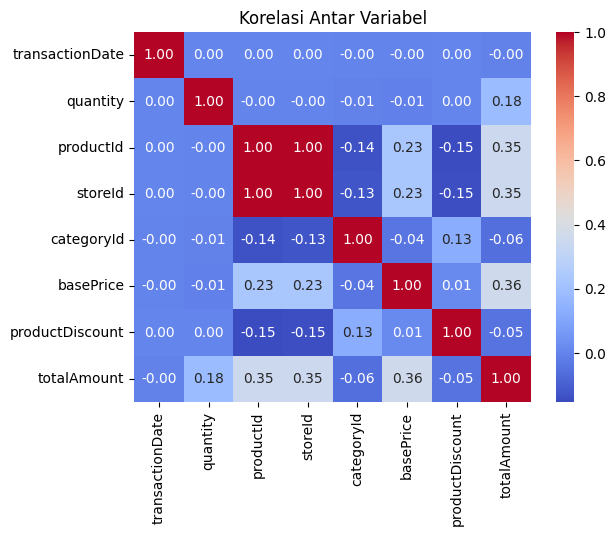

In [104]:
corr_matrix = final_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Variabel')
plt.show()

## Data Pre-processing